In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from math import sqrt
from numpy import mean
from scipy.stats import t

def independent_ttest_1(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) 
    # return everything
    return t_stat, df, cv, p

def independent_ttest_2(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return {'t statistics': t_stat, 'degree of freedom': df, 'p-value': p}

In [3]:
sacog = pd.read_excel('sacog_recoded_012021.xlsx')

In [4]:
list(sacog.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSameP

In [5]:
sacog[['May-ECommerce-Orders-PreparedFood', 'May-ECommerce-Frequency-PreparedFood', 'May-InStore-Frequency-PreparedFood']].head(5)

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Frequency-PreparedFood,May-InStore-Frequency-PreparedFood
0,0,Less than 1 time per week,Less than 1 time per week
1,0,Almost never,No Response
2,0,Never,Never
3,2,No Response,No Response
4,2,No Response,No Response


In [6]:
# Original coding
#freq_dict = {'More than 5 times per week': 7, 
#             '3 - 5 times per week': 6,
#             '2 - 3 times per week': 5,
#             'About 1 time per week': 4,
#             'Less than 1 time per week ': 3,
#             'Less than 1 time per month ': 2,
#             'Never': 1,
#             'Almost never': 1,
#             'No Response': 0}

# Change to monthly frequency
freq_dict = {'More than 5 times per week': 20, # 5*4
             '3 - 5 times per week': 16, # 4*4
             '2 - 3 times per week': 10, #2.5*4
             'About 1 time per week': 4, #1*4
             'Less than 1 time per week ': 3, 
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

In [7]:
sacog['Past_Freq_EPreparedFood'] = sacog['PastYear-ECommerce-Frequency-PreparedFood'].map(freq_dict)
sacog['Past_Freq_EGrocery'] = sacog['PastYear-ECommerce-Frequency-Groceries'].map(freq_dict)
sacog['Past_Freq_EOtherFood'] = sacog['PastYear-ECommerce-Frequency-OtherFood'].map(freq_dict)
sacog['Past_Freq_EPaperCleaning'] = sacog['PastYear-ECommerce-Frequency-PaperCleaning'].map(freq_dict)
sacog['Past_Freq_EClothing'] = sacog['PastYear-ECommerce-Frequency-Clothing'].map(freq_dict)
sacog['Past_Freq_EHomeOffice'] = sacog['PastYear-ECommerce-Frequency-HomeOffice'].map(freq_dict)
sacog['Past_Freq_EMedication'] = sacog['PastYear-ECommerce-Frequency-Medication'].map(freq_dict)
sacog['Past_Freq_EChildcare'] = sacog['PastYear-ECommerce-Frequency-ChildcareItems'].map(freq_dict)
sacog['Past_Freq_Eother'] = sacog['PastYear-ECommerce-Frequency-Other'].map(freq_dict)

In [8]:
sacog[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Freq_Eother']].describe()

,Past_Freq_EPreparedFood,Past_Freq_EGrocery,Past_Freq_EOtherFood,Past_Freq_EPaperCleaning,Past_Freq_EClothing,Past_Freq_EHomeOffice,Past_Freq_EMedication,Past_Freq_EChildcare,Past_Freq_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,2.076453,1.559633,1.348624,1.418960,1.840979,1.388379,1.529052,1.125382,0.614679
std,1.501624,1.306646,1.006508,0.987036,1.110092,0.850254,0.993034,0.746894,0.986799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,7.000000,7.000000,5.000000,7.000000,7.000000,5.000000,5.000000,4.000000,5.000000


In [9]:
sacog['Past_Try_EPreparedFood'] = sacog['Past_Freq_EPreparedFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EGrocery'] = sacog['Past_Freq_EGrocery'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EOtherFood'] = sacog['Past_Freq_EOtherFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EPaperCleaning'] = sacog['Past_Freq_EPaperCleaning'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EClothing'] = sacog['Past_Freq_EClothing'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EHomeOffice'] = sacog['Past_Freq_EHomeOffice'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EMedication'] = sacog['Past_Freq_EMedication'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EChildcare'] = sacog['Past_Freq_EChildcare'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_Eother'] = sacog['Past_Freq_Eother'].apply(lambda x: 1 if x > 1 else 0)

In [10]:
sacog[['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare', 'Past_Try_Eother']].describe()

,Past_Try_EPreparedFood,Past_Try_EGrocery,Past_Try_EOtherFood,Past_Try_EPaperCleaning,Past_Try_EClothing,Past_Try_EHomeOffice,Past_Try_EMedication,Past_Try_EChildcare,Past_Try_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.522936,0.293578,0.253823,0.366972,0.688073,0.425076,0.470948,0.195719,0.159021
std,0.500239,0.456099,0.435864,0.482718,0.463990,0.495112,0.499920,0.397361,0.366257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
sacog['tried'] = sacog[['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']].apply(np.sum, axis = 1)

In [12]:
sacog['tried'].describe()

count    327.000000
mean       3.217125
std        2.254909
min        0.000000
25%        1.500000
50%        3.000000
75%        5.000000
max        8.000000
Name: tried, dtype: float64

## 1. Online shopping style (by frequency)

### 1.1 Feb/2019 - Feb/2020 shopping style

In [13]:
X = sacog[['tried', 'Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']]

In [14]:
# Exclude those records with at least one 'no response' (327 -> 276)
X = X[(X[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']] != 0).all(axis=1)]
X.describe()

,tried,Past_Freq_EPreparedFood,Past_Freq_EGrocery,Past_Freq_EOtherFood,Past_Freq_EPaperCleaning,Past_Freq_EClothing,Past_Freq_EHomeOffice,Past_Freq_EMedication,Past_Freq_EChildcare,Past_Try_EPreparedFood,Past_Try_EGrocery,Past_Try_EOtherFood,Past_Try_EPaperCleaning,Past_Try_EClothing,Past_Try_EHomeOffice,Past_Try_EMedication,Past_Try_EChildcare
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.00000,276.000000,276.000000,276.000000,276.000000
mean,3.612319,2.275362,1.728261,1.500000,1.612319,2.108696,1.590580,1.760870,1.307971,0.568841,0.322464,0.275362,0.40942,0.786232,0.481884,0.543478,0.224638
std,2.123049,1.392281,1.248446,0.924416,0.885270,0.939515,0.715378,0.840384,0.640518,0.496138,0.468268,0.447508,0.49262,0.410710,0.500579,0.499011,0.418102
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000
75%,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
max,8.000000,7.000000,7.000000,5.000000,7.000000,7.000000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
X_ = X[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)

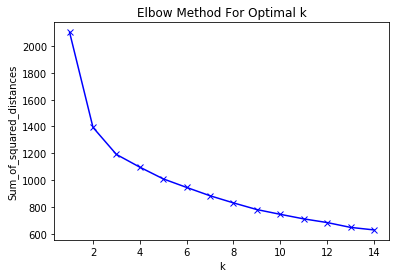

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 'Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Freq_Eother'

In [17]:
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week ': 3,
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

#### orange: Frequent ecommerce user. Do online purchase of all categories at a certain frequency with prepared food and grocery about 1 time per week.
#### blue: Do online shopping frequently, usually for prepared food ordering; also purchase clothing and medication from time to time.
#### green: Didn't do online shopping much. Use online platform occasionally for clothing and medication.

(array([0, 1, 2], dtype=int32), array([161,  57,  58]))

array([[1.27950311, 1.11801242, 1.22981366, 1.26708075, 1.96273292,
        1.49689441, 1.63975155, 1.23602484],
       [3.75438596, 3.9122807 , 2.36842105, 2.70175439, 2.50877193,
        1.98245614, 2.14035088, 1.59649123],
       [3.5862069 , 1.27586207, 1.39655172, 1.5       , 2.12068966,
        1.46551724, 1.72413793, 1.22413793]])

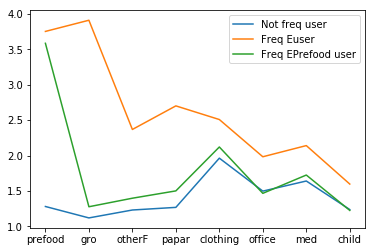

In [18]:
km3 = KMeans(n_clusters=3, n_init = 25, max_iter = 1000, random_state = 0)
km3 = km3.fit(X_)
display(np.unique(km3.labels_, return_counts=True))
display(km3.cluster_centers_)

x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = ['Not freq user', 'Freq Euser', 'Freq EPrefood user']
y = km3.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.show()

0    161
2     58
1     57
Name: class, dtype: int64

/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

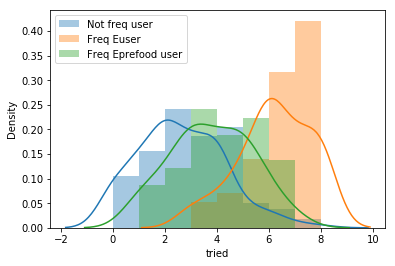

In [19]:
X['class'] = km3.labels_
display(X['class'].value_counts())
sns.distplot(X[X['class'] == 0]['tried'], label = 'Not freq user')
sns.distplot(X[X['class'] == 1]['tried'], label = 'Freq Euser')
sns.distplot(X[X['class'] == 2]['tried'], label = 'Freq Eprefood user')
plt.legend()

In [20]:
X[X['class'] == 1][['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']].apply(np.sum, axis = 0)

Past_Try_EPreparedFood     54
Past_Try_EGrocery          57
Past_Try_EOtherFood        37
Past_Try_EPaperCleaning    53
Past_Try_EClothing         54
Past_Try_EHomeOffice       38
Past_Try_EMedication       39
Past_Try_EChildcare        22
dtype: int64

#### The mean of number of categories tried for different group is significantly different. Though group 0 and 1 has similar online shopping frequency for categories other than prepared food, users of group 1 is more ecommerce penetrated in that they tried ecommerce for a more various kind of products.

In [21]:
## The mean of number of categories tried for different group is significantly different
display(independent_ttest_2(X[X['class'] == 0]['tried'], X[X['class'] == 2]['tried'], 0.05))
display(independent_ttest_2(X[X['class'] == 2]['tried'], X[X['class'] == 1]['tried'], 0.05))

{'t statistics': -4.635675259600052,
 'degree of freedom': 217,
 'p-value': 6.139984069175597e-06}

{'t statistics': -8.696917335233644,
 'degree of freedom': 113,
 'p-value': 3.108624468950438e-14}

In [22]:
dict_km3 = {0: 'Not Freq EUser', 1: 'Freq EUser', 2: 'Efood User'}


In [23]:
sacog.loc[(sacog[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']] != 0).all(axis=1), 'Before Group'] = list(map(dict_km3.get, km3.labels_))

#### Try with four groups

In [24]:
km4 = KMeans(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4 = km4.fit(X_)
display(np.unique(km4.labels_, return_counts=True))
display(km4.cluster_centers_)

(array([0, 1, 2, 3], dtype=int32), array([ 58,  46,  38, 134]))

array([[3.5862069 , 1.27586207, 1.39655172, 1.5       , 2.12068966,
        1.46551724, 1.72413793, 1.22413793],
       [4.17391304, 4.04347826, 2.52173913, 2.65217391, 2.36956522,
        1.86956522, 2.08695652, 1.45652174],
       [1.52631579, 2.02631579, 1.55263158, 2.26315789, 3.13157895,
        2.02631579, 1.94736842, 1.71052632],
       [1.26865672, 1.04477612, 1.17910448, 1.11940299, 1.7238806 ,
        1.42537313, 1.6119403 , 1.17910448]])

#### Classification with 4 clusters identified a new group with high Eclothing frequency

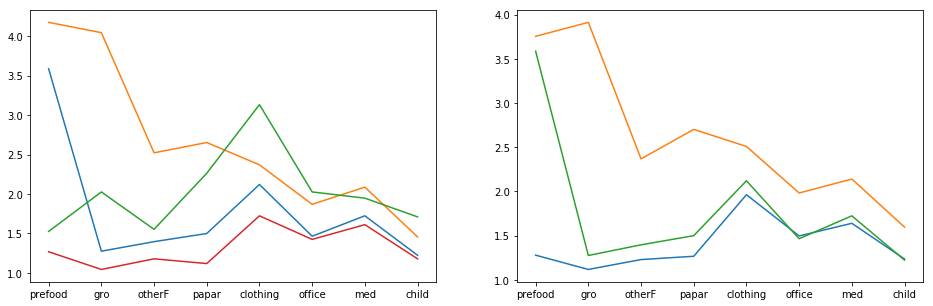

In [25]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km4.cluster_centers_.T)
plt.subplot(1, 2, 2)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_.T)

3    134
0     58
1     46
2     38
Name: class4, dtype: int64

/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

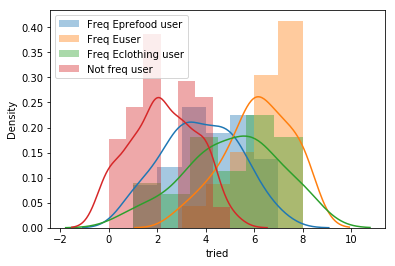

In [26]:
X['class4'] = km4.labels_
display(X['class4'].value_counts())
sns.distplot(X[X['class4'] == 0]['tried'], label = 'Freq Eprefood user')
sns.distplot(X[X['class4'] == 1]['tried'], label = 'Freq Euser')
sns.distplot(X[X['class4'] == 2]['tried'], label = 'Freq Eclothing user')
sns.distplot(X[X['class4'] == 3]['tried'], label = 'Not freq user')
plt.legend()

In [27]:
pd.crosstab(X['class'], X['class4'])

class4,0,1,2,3
class,,,,
0,0,0,27,134
1,0,46,11,0
2,58,0,0,0


In [28]:
# Original groups
display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 3]['tried'], 0.05))
display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 1]['tried'], 0.05))

display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 2]['tried'], 0.05)) #Ecloth v.s. Efood
display(independent_ttest_2(X[X['class4'] == 2]['tried'], X[X['class4'] == 1]['tried'], 0.05)) #Ecloth v.s. freq euser

{'t statistics': 6.901180136108397,
 'degree of freedom': 190,
 'p-value': 7.482214847698287e-11}

{'t statistics': -8.03692976303895,
 'degree of freedom': 102,
 'p-value': 1.6988632722814145e-12}

{'t statistics': -3.5937455446599382,
 'degree of freedom': 94,
 'p-value': 0.0005212694650331695}

{'t statistics': -2.970785549087896,
 'degree of freedom': 82,
 'p-value': 0.0038960253020070557}

### 1.2 May shopping behavior 

In [29]:
sacog['May_Freq_EPreparedFood'] = sacog['May-ECommerce-Frequency-PreparedFood'].map(freq_dict)
sacog['May_Freq_EGrocery'] = sacog['May-ECommerce-Frequency-Groceries'].map(freq_dict)
sacog['May_Freq_EOtherFood'] = sacog['May-ECommerce-Frequency-OtherFood'].map(freq_dict)
sacog['May_Freq_EPaperCleaning'] = sacog['May-ECommerce-Frequency-PaperCleaning'].map(freq_dict)
sacog['May_Freq_EClothing'] = sacog['May-ECommerce-Frequency-Clothing'].map(freq_dict)
sacog['May_Freq_EHomeOffice'] = sacog['May-ECommerce-Frequency-HomeOffice'].map(freq_dict)
sacog['May_Freq_EMedication'] = sacog['May-ECommerce-Frequency-Medication'].map(freq_dict)
sacog['May_Freq_EChildcare'] = sacog['May-ECommerce-Frequency-ChildcareItems'].map(freq_dict)
sacog['May_Freq_Eother'] = sacog['May-ECommerce-Frequency-Other'].map(freq_dict)

In [30]:
sacog['May_Freq_PreparedFood'] = sacog['May-InStore-Frequency-PreparedFood'].map(freq_dict)
sacog['May_Freq_Grocery'] = sacog['May-InStore-Frequency-Groceries'].map(freq_dict)
sacog['May_Freq_OtherFood'] = sacog['May-InStore-Frequency-OtherFood'].map(freq_dict)
sacog['May_Freq_PaperCleaning'] = sacog['May-InStore-Frequency-PaperCleaning'].map(freq_dict)
sacog['May_Freq_Clothing'] = sacog['May-InStore-Frequency-Clothing'].map(freq_dict)
sacog['May_Freq_HomeOffice'] = sacog['May-InStore-Frequency-HomeOffice'].map(freq_dict)
sacog['May_Freq_Medication'] = sacog['May-InStore-Frequency-Medication'].map(freq_dict)
sacog['May_Freq_Childcare'] = sacog['May-InStore-Frequency-ChildcareItems'].map(freq_dict)
sacog['May_Freq_other'] = sacog['May-InStore-Frequency-Other'].map(freq_dict)

#### Involves imputation of data

In [31]:
## Imputation from May_order_XXX: if order during surveyed week > 0, impute ecommerce purchase frequency as 4-about one time a week
sacog.loc[sacog['May-ECommerce-Orders-PreparedFood'] > 0, 'May_Freq_EPreparedFood']=4
sacog.loc[sacog['May-ECommerce-Orders-Groceries'] > 0, 'May_Freq_EGrocery']=4
sacog.loc[sacog['May-ECommerce-Orders-OtherFood'] > 0, 'May_Freq_EOtherFood']=4
sacog.loc[sacog['May-ECommerce-Orders-PaperCleaning'] > 0, 'May_Freq_EPaperCleaning']=4
sacog.loc[sacog['May-ECommerce-Orders-Clothing'] > 0, 'May_Freq_EClothing']=4
sacog.loc[sacog['May-ECommerce-Orders-HomeOffice'] > 0, 'May_Freq_EHomeOffice']=4
sacog.loc[sacog['May-ECommerce-Orders-Medication'] > 0, 'May_Freq_EMedication']=4
sacog.loc[sacog['May-ECommerce-Orders-ChildcareItems'] > 0, 'May_Freq_EChildcare']=4
sacog.loc[sacog['May-ECommerce-Orders-Other'] > 0, 'May_Freq_Eother']=4

In [87]:
sacog['May_Try_EPreparedFood'] = sacog['May_Freq_EPreparedFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EGrocery'] = sacog['May_Freq_EGrocery'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EOtherFood'] = sacog['May_Freq_EOtherFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EPaperCleaning'] = sacog['May_Freq_EPaperCleaning'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EClothing'] = sacog['May_Freq_EClothing'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EHomeOffice'] = sacog['May_Freq_EHomeOffice'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EMedication'] = sacog['May_Freq_EMedication'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_EChildcare'] = sacog['May_Freq_EChildcare'].apply(lambda x: 1 if x > 1 else 0)
sacog['May_Try_Eother'] = sacog['May_Freq_Eother'].apply(lambda x: 1 if x > 1 else 0)

In [88]:
sacog['try'] = sacog[['May_Try_EPreparedFood', 'May_Try_EGrocery', 'May_Try_EOtherFood', 'May_Try_EPaperCleaning', 
     'May_Try_EClothing', 'May_Try_EHomeOffice', 'May_Try_EMedication', 'May_Try_EChildcare']].apply(np.sum, axis = 1)

In [32]:
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week ': 3,
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

In [33]:
def freq(trips):
    if trips/2 >= 5:
        return 7
    elif trips/2 >= 3:
        return 6
    elif trips/2 >= 2:
        return 5
    elif trips/2 >= 1:
        return 4
    elif trips/2 < 1:
        return 3

In [34]:
sacog.update(sacog.loc[sacog['May-InStore-Trips-PreparedFood'] > 0, 'May_Freq_PreparedFood'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-Groceries'] > 0, 'May_Freq_Grocery'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-OtherFood'] > 0, 'May_Freq_OtherFood'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-PaperCleaning'] > 0, 'May_Freq_PaperCleaning'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-Clothing'] > 0, 'May_Freq_Clothing'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-HomeOffice'] > 0, 'May_Freq_HomeOffice'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-Medication'] > 0, 'May_Freq_Medication'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-ChildcareItems'] > 0, 'May_Freq_Childcare'].apply(freq))
sacog.update(sacog.loc[sacog['May-InStore-Trips-Other'] > 0, 'May_Freq_other'].apply(freq))

In [35]:
sacog[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare', 'May_Freq_Eother']].describe()

,May_Freq_EPreparedFood,May_Freq_EGrocery,May_Freq_EOtherFood,May_Freq_EPaperCleaning,May_Freq_EClothing,May_Freq_EHomeOffice,May_Freq_EMedication,May_Freq_EChildcare,May_Freq_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,2.342508,1.678899,1.223242,1.308869,1.862385,1.302752,1.602446,1.024465,0.883792
std,1.710343,1.509971,1.263823,1.215700,1.480764,1.214720,1.453067,1.050568,1.516357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000


In [36]:
sacog[['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].describe()

,May_Freq_PreparedFood,May_Freq_Grocery,May_Freq_OtherFood,May_Freq_PaperCleaning,May_Freq_Clothing,May_Freq_HomeOffice,May_Freq_Medication,May_Freq_Childcare
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,2.571865,2.920489,1.749235,2.079511,1.571865,1.425076,1.804281,1.073394
std,1.174971,0.704788,1.340082,1.118627,1.030309,0.946278,1.087399,0.865562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
max,6.000000,6.000000,6.000000,5.000000,4.000000,5.000000,4.000000,7.000000


In [102]:
XE = sacog[['try', 'May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']] 

In [103]:
XE = XE[(XE[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']]!= 0).all(axis=1)]
XE_ = XE_[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']] 

In [97]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(XE_)
    Sum_of_squared_distances.append(km.inertia_)

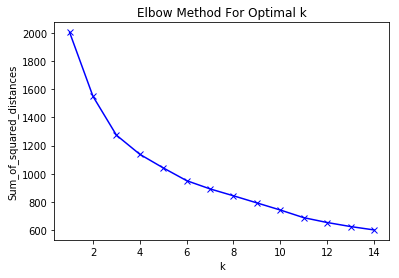

In [98]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Similar group to those before COVID
#### Green: see increase frequency in online medication purchase, other food, office; decrease in grocery?
#### Blue: see increased frequeny in Egrocery
#### Orange: increased frequency in Egrocery

#### sample size: Before (Freq Euser: 57; Freq Epreparedfood: 58; Not Freq User: 161; Total: 276); May (Freq Euser: 43; Freq Epreparedfood: 83; Not Freq User: 67; Total: 193)
#### Compare to before COVID, for Freq Euser, see increased frequency in other categories than prepared food and grocery; for Not Freq Euser, see increased frequency in egrocery and medication; for Frequent Eprefood User, see increased online purchase frequency in prepared food, grocery, office and medication. 

Text(0.5,1,'Freq Eprepfood User')

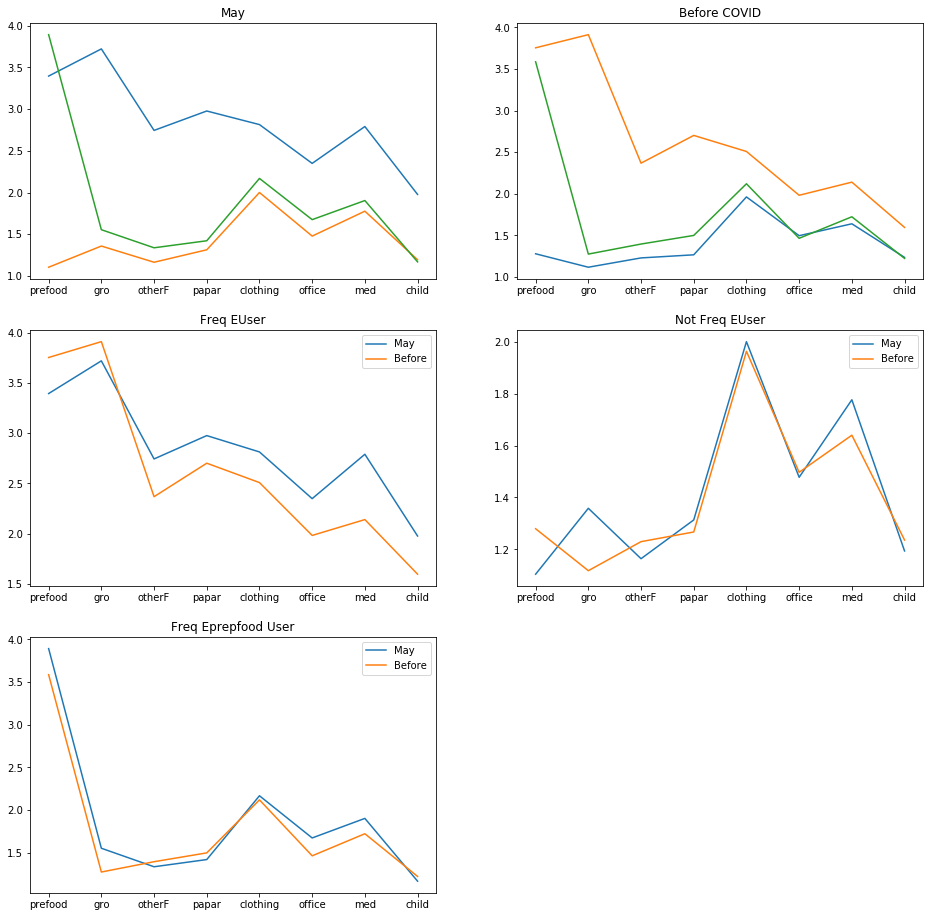

In [99]:
km3_ = KMeans(n_clusters=3, n_init = 25, max_iter = 1000, random_state = 0)
km3_ = km3_.fit(XE_)

plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3_.cluster_centers_.T)
plt.title('May')
plt.subplot(3, 2, 2)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_.T)
plt.title('Before COVID')
plt.subplot(3, 2, 3)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3_.cluster_centers_[0], label = 'May')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_[1], label = 'Before')
plt.legend()
plt.title('Freq EUser')
plt.subplot(3, 2, 4)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3_.cluster_centers_[1], label = 'May')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_[0], label = 'Before')
plt.legend()
plt.title('Not Freq EUser')
plt.subplot(3, 2, 5)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3_.cluster_centers_[2], label = 'May')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_[2], label = 'Before')
plt.legend()
plt.title('Freq Eprepfood User')

2    83
1    67
0    43
Name: class, dtype: int64

/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

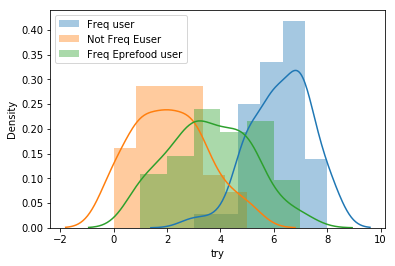

In [104]:
XE['class'] = km3_.labels_
display(XE['class'].value_counts())
sns.distplot(XE[XE['class'] == 0]['try'], label = 'Freq user')
sns.distplot(XE[XE['class'] == 1]['try'], label = 'Not Freq Euser')
sns.distplot(XE[XE['class'] == 2]['try'], label = 'Freq Eprefood user')
plt.legend()

In [ ]:
display(independent_ttest_2(X[X['class'] == 0]['tried'], X[X['class'] == 2]['tried'], 0.05))
display(independent_ttest_2(X[X['class'] == 2]['tried'], X[X['class'] == 1]['tried'], 0.05))

In [107]:
display(independent_ttest_2(XE[XE['class'] == 1]['try'], X[X['class'] == 0]['tried'], 0.05))
display(independent_ttest_2(XE[XE['class'] == 2]['try'], XE[XE['class'] == 1]['try'], 0.05))

{'t statistics': -2.3228608488985336,
 'degree of freedom': 226,
 'p-value': 0.021075736521797728}

{'t statistics': 6.142686054476593,
 'degree of freedom': 148,
 'p-value': 7.130232182461782e-09}

In [111]:
XE['class'] = km3_.labels_
XE['class4'] = km4_.labels_
pd.crosstab(XE['class'], XE['class4'])

class4,0,1,2,3
class,,,,
0,19,2,22,0
1,0,0,6,61
2,0,68,15,0


In [45]:
km3_.cluster_centers_

array([[3.39534884, 3.72093023, 2.74418605, 2.97674419, 2.81395349,
        2.34883721, 2.79069767, 1.97674419],
       [1.10447761, 1.35820896, 1.1641791 , 1.31343284, 2.        ,
        1.47761194, 1.7761194 , 1.19402985],
       [3.89156627, 1.55421687, 1.3373494 , 1.42168675, 2.1686747 ,
        1.6746988 , 1.90361446, 1.1686747 ]])

In [46]:
dict_km3_ = {0: 'Freq EUser', 1: 'Not Freq EUser', 2: 'Efood User'}

In [ ]:
dict_km4_ = {0: 'Freq EUser', 1: 'Efood User', 2: 'Efood&Grocery User', 3: 'Infreq User'}

In [47]:
sacog.loc[(sacog[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']]!= 0).all(axis=1), 'May Group'] = list(map(dict_km3_.get, km3_.labels_))

In [86]:
display(independent_ttest_2(sacog[sacog['Before Group'].isin(['Freq EUser'])]['Past_Freq_EChildcare'], sacog[sacog['May Group'].isin(['Freq EUser'])]['May_Freq_EChildcare'], 0.05))
display(independent_ttest_1(sacog[sacog['Before Group'].isin(['Efood User'])]['Past_Freq_EMedication'], sacog[sacog['May Group'].isin(['Efood User'])]['May_Freq_EMedication'], 0.05))
display(independent_ttest_1(sacog[sacog['Before Group'].isin(['Not Freq EUser'])]['Past_Freq_EMedication'], sacog[sacog['May Group'].isin(['Not Freq EUser'])]['May_Freq_EMedication'], 0.05))


{'t statistics': -1.7401355444756044,
 'degree of freedom': 98,
 'p-value': 0.08497437369440974}

(-1.0345975481406224, 139, 1.6558898677725957, 0.15132676126375988)

(-1.112185365953391, 226, 1.6516238593187924, 0.1336200629888621)

#### 1.2.2 Four clusters
Ecommerce dependent: High frequency in food, grocery, paper, clothing, medication (highly ecommerce dependent) (19)<br>
Efood&Gro dependent: Green Frequent user of online prepared food and grocery; purchase paper, clothing, medication from time to time (43) <br>
Efood dependent: like order prepared food online; purchase clothing, office staff and medication from time to time (70) <br>
Ecommerce independent: Not Ecommerce dependent, buy clothing, office staff,  medication from time to time (61) <br>

Compare to three clusters, four clusters distinguish people rely on Egrocery during the pandemic and people with high online shopping frequency in both essential (food, grocery, paper, medication) and non-essential (clothing) categories.

Text(0.5,1,'Three clusters')

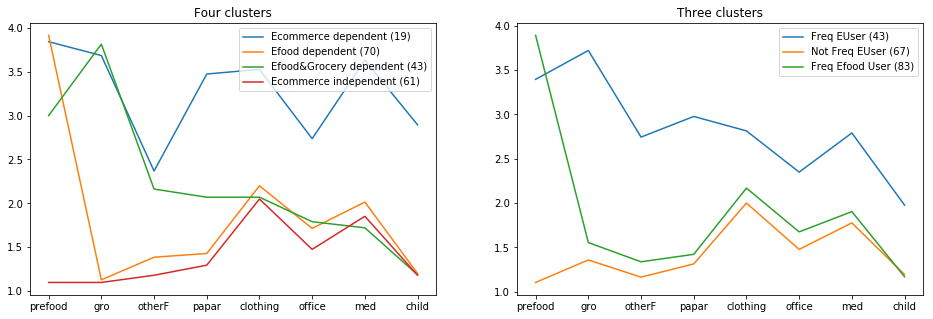

In [58]:
km4_ = KMeans(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4_ = km4_.fit(XE)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = ['Ecommerce dependent (19)', 'Efood dependent (70)', 'Efood&Grocery dependent (43)', 'Ecommerce independent (61)']
y = km4_.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)
plt.legend()
plt.title('Four clusters')

plt.subplot(1, 2, 2)
x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = ['Freq EUser (43)', 'Not Freq EUser (67)', 'Freq Efood User (83)']
y = km3_.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)
plt.legend()
plt.title('Three clusters')

In [59]:
dict_km4_ = {0: 'Freq EUser', 1: 'Efood User', 2: 'Efood&Grocery User', 3: 'Infreq User'}

In [60]:
sacog.loc[(sacog[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']]!= 0).all(axis=1), 'May Group4'] = list(map(dict_km4_.get, km4_.labels_))

### 1.3 Dynamic of Ecommerce shopping style

In [61]:
pd.crosstab(sacog['Before Group'], sacog['May Group'])

May Group,Efood User,Freq EUser,Not Freq EUser
Before Group,,,
Efood User,24,14,1
Freq EUser,13,13,2
Not Freq EUser,40,15,40


In [62]:
pd.crosstab(sacog['Before Group'], sacog['May Group4'])

May Group4,Efood User,Efood&Grocery User,Freq EUser,Infreq User
Before Group,,,,
Efood User,19,13,6,1
Freq EUser,9,10,9,0
Not Freq EUser,37,19,3,36


In [63]:
more = sacog[sacog['Before Group'].isin(['Not Freq EUser']) & sacog['May Group'].isin(['Freq EUser'])]
less = sacog[sacog['Before Group'].isin(['Freq EUser']) & sacog['May Group'].isin(['Not Freq EUser'])]

#### For those who are clustered in 'not freq user' before and 'freq user' in May, see great increase in Efood and Egrocery, also paper, clothing, medication

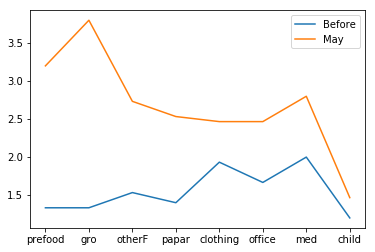

In [64]:
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], more[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']].mean(axis = 0), label = 'Before')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], more[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']].mean(axis = 0), label = 'May')
plt.legend()

#### For those who are clustered in 'freq user' before and 'not freq user' in May, grocery shopping frequency is not decreasing but see decrease in online food & paper shopping. 

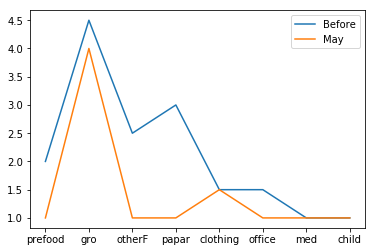

In [65]:
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], less[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']].mean(axis = 0), label = 'Before')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], less[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']].mean(axis = 0), label = 'May')
plt.legend()

### 1.4 Substitution or Complement

In [66]:
list(sacog.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSameP

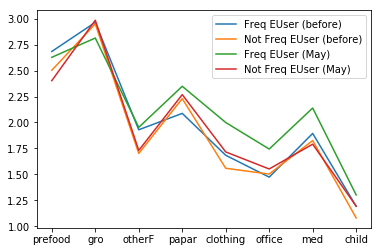

In [67]:
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['Before Group'].isin(['Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Freq EUser (before)')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['Before Group'].isin(['Not Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Not Freq EUser (before)')
plt.legend()
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['May Group'].isin(['Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Freq EUser (May)')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['May Group'].isin(['Not Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Not Freq EUser (May)')
plt.legend()

## next step: 
#### 1) compare in-store style for different Ecommerce group;
#### 2) group in-store style
#### 3) group shopping style (?) combine in-store & online shopping behavior
#### 4) Explore the transition of style (clear)